# 地理信息系统设计与开发（Geometry Union）

In [13]:
import os
import ogr
import osr
import json
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def displayPolygon(geom):
    ring=geom.GetGeometryRef(0)
    coords=ring.GetPoints()
    x,y=zip(*coords)
    #plt.figure()
    plt.plot(x,y,'k')
    plt.fill(x,y,'p')
    #plt.show()

In [21]:
def myDisplayFeature(polygon):
    geom=polygon.geometry()
    displayPolygon(geom)

In [22]:
def myDisplayPolygon(geom):
    plt.figure()
    if(geom.GetGeometryName() == 'MULTIPOLYGON'):
        for i in range(geom.GetGeometryCount()):
            ring=geom.GetGeometryRef(i)
            #print('ring:',ring)
            subring=ring.GetGeometryRef(0) 
            #print("subring:",subring)   
            coords=subring.GetPoints()
            #print("coords:",coords)
            x,y=zip(*coords)
            #print("x=",x,"y=",y)
            plt.plot(x,y,'black')
            plt.fill(x,y,'p')
    else:
        ring=geom.GetGeometryRef(0)
        #print("ring:",ring)
        coords=ring.GetPoints()
        #print("coords:",coords)
        x,y=zip(*coords)
    #print("x=",x,"y=",y)
    plt.plot(x,y,'black')
    plt.fill(x,y,'p')

In [23]:
def myFeatureUnion(poly1,poly2):
    geom1=poly1.geometry()
    geom2=poly2.geometry()
    union = geom1.Union(geom2)
    return union

In [24]:
def myFeatureGeomUnion(poly,union):
    geom=poly.geometry()
    union=geom.Union(union)
    return union

## intersection

POLYGON ((1208064.27124304 614453.958118695,1208064.27124304 624154.678377892,1219317.10674371 624154.678377892,1219317.10674371 614453.958118695,1208064.27124304 614453.958118695))


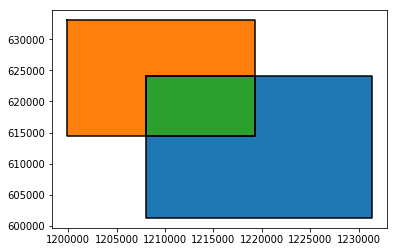

In [25]:
wkt1 = "POLYGON ((1208064.271243039 624154.6783778917, 1208064.271243039 601260.9785661874, 1231345.9998651114 601260.9785661874, 1231345.9998651114 624154.6783778917, 1208064.271243039 624154.6783778917))"
wkt2 = "POLYGON ((1199915.6662253144 633079.3410163528, 1199915.6662253144 614453.958118695, 1219317.1067437078 614453.958118695, 1219317.1067437078 633079.3410163528, 1199915.6662253144 633079.3410163528)))"

poly1 = ogr.CreateGeometryFromWkt(wkt1)
displayPolygon(poly1)
poly2 = ogr.CreateGeometryFromWkt(wkt2)
displayPolygon(poly2)
intersection = poly1.Intersection(poly2)
displayPolygon(intersection)
print(intersection.ExportToWkt())

## Union

POLYGON ((1208064.27124304 624154.678377892,1208064.27124304 601260.978566187,1231345.99986511 601260.978566187,1231345.99986511 624154.678377892,1208064.27124304 624154.678377892))
POLYGON ((1199915.66622531 633079.341016353,1199915.66622531 614453.958118695,1219317.10674371 614453.958118695,1219317.10674371 633079.341016353,1199915.66622531 633079.341016353))
POLYGON ((1219317.10674371 624154.678377892,1231345.99986511 624154.678377892,1231345.99986511 601260.978566187,1208064.27124304 601260.978566187,1208064.27124304 614453.958118695,1199915.66622531 614453.958118695,1199915.66622531 633079.341016353,1219317.10674371 633079.341016353,1219317.10674371 624154.678377892))


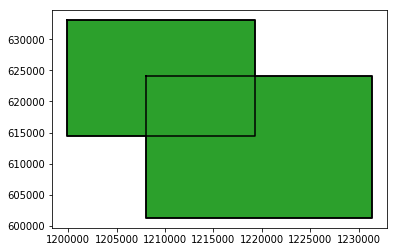

In [26]:
wkt1 = "POLYGON ((1208064.271243039 624154.6783778917, 1208064.271243039 601260.9785661874, 1231345.9998651114 601260.9785661874, 1231345.9998651114 624154.6783778917, 1208064.271243039 624154.6783778917))"

wkt2 = "POLYGON ((1199915.6662253144 633079.3410163528, 1199915.6662253144 614453.958118695, 1219317.1067437078 614453.958118695, 1219317.1067437078 633079.3410163528, 1199915.6662253144 633079.3410163528)))"

poly1 = ogr.CreateGeometryFromWkt(wkt1)
displayPolygon(poly1)
poly2 = ogr.CreateGeometryFromWkt(wkt2)
displayPolygon(poly2)
union = poly1.Union(poly2)
displayPolygon(union)

print (poly1)
print (poly2)
print (union.ExportToWkt())

## 打开第一个数据集，获取属性表结构等信息，并显示

ds1.type: <class 'osgeo.ogr.DataSource'>
feature count: 1 field count: 2
NAME String
area Real


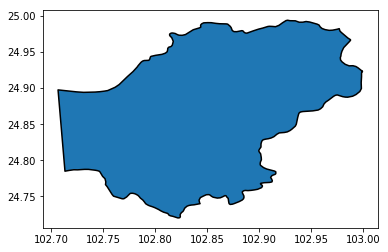

In [27]:
ds1=ogr.Open(r'D:\昆明1比1万\呈贡区.shp')
print("ds1.type:",type(ds1))
layer_polygon1=ds1.GetLayer(0)
FeatureDefn1=layer_polygon1.GetLayerDefn()
print("feature count:",layer_polygon1.GetFeatureCount(),"field count:",FeatureDefn1.GetFieldCount())
for i in range(FeatureDefn1.GetFieldCount()):
    FieldDefn1=FeatureDefn1.GetFieldDefn(i)
    print(FieldDefn1.GetName(),FieldDefn1.GetTypeName())
for row in layer_polygon1:
    myDisplayFeature(row)

## 打开第二个数据集，获取属性表结构等信息，并显示

ds2.type: <class 'osgeo.ogr.DataSource'>
feature count: 4 field count: 7
NAME String
POPNAME String
CODE String
TYPE Integer
DISPLAY Integer
EXTENTION Integer
UPDATE Date


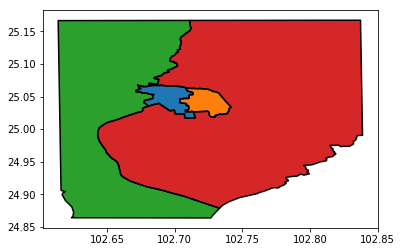

In [28]:
ds2=ogr.Open(r'D:\昆明1比1万\昆明城区.shp')
print("ds2.type:",type(ds2))
layer_polygon2=ds2.GetLayer(0)
FeatureDefn2=layer_polygon2.GetLayerDefn()
print("feature count:",layer_polygon2.GetFeatureCount(),"field count:",FeatureDefn2.GetFieldCount())
for i in range(FeatureDefn2.GetFieldCount()):
    FieldDefn2=FeatureDefn2.GetFieldDefn(i)
    print(FieldDefn2.GetName(),FieldDefn2.GetTypeName())
for row in layer_polygon2:
    myDisplayFeature(row)

## 创建新的图层，并合并属性表结构

In [29]:
driver = ogr.GetDriverByName('ESRI Shapefile')

outSpatialRef = layer_polygon1.GetSpatialRef()
outputShapefile = 'polygonunion.shp'
if os.path.exists(outputShapefile):
    driver.DeleteDataSource(outputShapefile)
outDataSet = driver.CreateDataSource(outputShapefile)
outLayer = outDataSet.CreateLayer("polygonunion", outSpatialRef, geom_type=ogr.wkbMultiPolygon)

for i in range(FeatureDefn1.GetFieldCount()):
    FieldDefn1=FeatureDefn1.GetFieldDefn(i)
    outLayer.CreateField(FieldDefn1)
for j in range(FeatureDefn2.GetFieldCount()):
    FieldDefn2=FeatureDefn2.GetFieldDefn(j)
    #outLayer.CreateField(FieldDefn2)
    flag=0
    for i in range(FeatureDefn1.GetFieldCount()):
        FieldDefn1=FeatureDefn1.GetFieldDefn(i)
        if(FieldDefn2.GetName()==FieldDefn1.GetName()):
            print("same field:",FieldDefn2.GetName())
            flag=1
            break
    if(flag==0):
        outLayer.CreateField(FieldDefn2)

print("feature count:",outLayer.GetFeatureCount(),"field count:",outLayer.GetLayerDefn().GetFieldCount())

same field: NAME
feature count: 0 field count: 8


## 首先Union头两个feature

MULTIPOLYGON


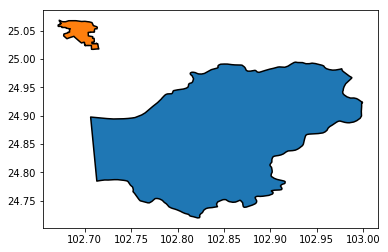

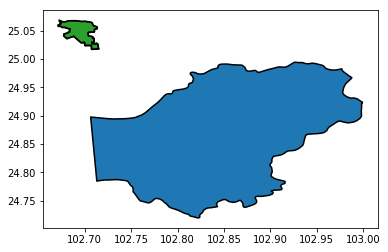

In [34]:
layer_polygon1.ResetReading()
layer_polygon2.ResetReading()
poly1 = layer_polygon1.GetNextFeature()
poly2 = layer_polygon2.GetNextFeature()
union=myFeatureUnion(poly1,poly2)
print(union.GetGeometryName())
myDisplayFeature(poly1)
myDisplayFeature(poly2)
myDisplayPolygon(union)

## 将第一个图层所有feature分别与union进行Union

In [39]:
while poly1:
    poly1 = layer_polygon1.GetNextFeature()
    if(poly1 == None):
        break
    union = myFeatureGeomUnion(poly1,union)
    print(union.GetGeometryName())
    myDisplayPolygon(union)

## 再将第二个图层所有feature分别与union进行Union

MULTIPOLYGON
POLYGON
POLYGON


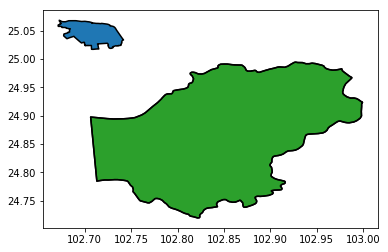

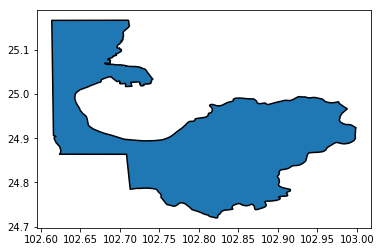

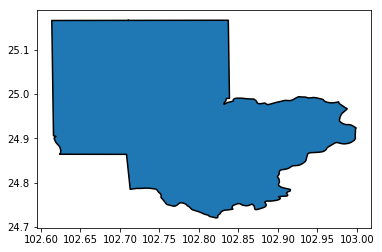

In [40]:
while poly2:
    poly2 = layer_polygon2.GetNextFeature()
    if(poly2 == None):
        break
    union = myFeatureGeomUnion(poly2,union)
    print(union.GetGeometryName())
    myDisplayPolygon(union)	

In [41]:
outDataSet=None